In [1]:
import os
import pandas as pd

# Creating the dataframe with 300 entries pr month for 12 years
# Get the directory where the script is located
base_dir = os.getcwd()

# Initialize list to collect dataframes
sampled_dfs = []

# Loop through subfolders in the current directory
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)

    # Skip if not a directory or not a month folder
    if not os.path.isdir(folder_path) or " " not in folder:
        continue

    csv_path = os.path.join(folder_path, "T_ONTIME_REPORTING.csv")

    if os.path.exists(csv_path):
        try:
            df = pd.read_csv(csv_path)

            # Sample 300 or all if less
            sample_size = min(300, len(df))
            sampled = df.sample(n=sample_size, random_state=42)

            sampled_dfs.append(sampled)

        except Exception as e:
            print(f"Error reading {csv_path}: {e}")

# Combine all samples
if sampled_dfs:
    df = pd.concat(sampled_dfs, ignore_index=True)
    print(df.head())
    # Optionally save:
    # combined_df.to_csv("sampled_data.csv", index=False)
else:
    print("No data sampled.")


   YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK                FL_DATE  \
0  2025        2      4             6            7   4/6/2025 12:00:00 AM   
1  2025        2      4            18            5  4/18/2025 12:00:00 AM   
2  2025        2      4            21            1  4/21/2025 12:00:00 AM   
3  2025        2      4            25            5  4/25/2025 12:00:00 AM   
4  2025        2      4            25            5  4/25/2025 12:00:00 AM   

   OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN ORIGIN_STATE_NM  ...  \
0             5683.0              12478    JFK        New York  ...   
1             2923.0              11537    ELM        New York  ...   
2              781.0              12478    JFK        New York  ...   
3             2307.0              11292    DEN        Colorado  ...   
4             1114.0              11298    DFW           Texas  ...   

   DEST_CITY_NAME  DEST_STATE_NM  CRS_DEP_TIME DEP_TIME CRS_ARR_TIME ARR_TIME  \
0    Savannah, GA        Geor

In [2]:
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_STATE_NM,...,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,ARR_DEL15,ARR_TIME_BLK,FLIGHTS,DISTANCE
0,2025,2,4,6,7,4/6/2025 12:00:00 AM,5683.0,12478,JFK,New York,...,"Savannah, GA",Georgia,1845,1841.0,2135,2103.0,0.0,2100-2159,1.0,718.0
1,2025,2,4,18,5,4/18/2025 12:00:00 AM,2923.0,11537,ELM,New York,...,"Sanford, FL",Florida,2011,2015.0,2248,2223.0,0.0,2200-2259,1.0,954.0
2,2025,2,4,21,1,4/21/2025 12:00:00 AM,781.0,12478,JFK,New York,...,"Las Vegas, NV",Nevada,2115,2104.0,17,14.0,0.0,0001-0559,1.0,2248.0
3,2025,2,4,25,5,4/25/2025 12:00:00 AM,2307.0,11292,DEN,Colorado,...,"Lihue, HI",Hawaii,1200,1210.0,1546,1540.0,0.0,1500-1559,1.0,3414.0
4,2025,2,4,25,5,4/25/2025 12:00:00 AM,1114.0,11298,DFW,Texas,...,"Houston, TX",Texas,1928,1919.0,2050,2056.0,0.0,2000-2059,1.0,224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,2024,3,9,5,4,9/5/2024 12:00:00 AM,61.0,12889,LAS,Nevada,...,"Spokane, WA",Washington,810,802.0,1039,1024.0,0.0,1000-1059,1.0,806.0
3596,2024,3,9,20,5,9/20/2024 12:00:00 AM,759.0,11292,DEN,Colorado,...,"Seattle, WA",Washington,1545,1630.0,1741,1806.0,1.0,1700-1759,1.0,1024.0
3597,2024,3,9,25,3,9/25/2024 12:00:00 AM,4370.0,12953,LGA,New York,...,"Greer, SC",South Carolina,2100,2058.0,2309,2257.0,0.0,2300-2359,1.0,610.0
3598,2024,3,9,20,5,9/20/2024 12:00:00 AM,2533.0,12892,LAX,California,...,"Las Vegas, NV",Nevada,745,745.0,855,844.0,0.0,0800-0859,1.0,236.0


In [2]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def hhmm_to_minutes(x):
    """Konverter HHMM (fx 1325) -> minutter siden midnat."""
    try:
        x = int(float(str(x).strip()))
        h, m = x // 100, x % 100
        return h * 60 + m
    except:
        return np.nan

# Konverter tider og beregn minut-forsinkelse
df["ARR_TIME_MIN"] = df["ARR_TIME"].apply(hhmm_to_minutes)
df["CRS_ARR_TIME_MIN"] = df["CRS_ARR_TIME"].apply(hhmm_to_minutes)
df["ARR_DELAY_MIN"] = df["ARR_TIME_MIN"] - df["CRS_ARR_TIME_MIN"]

df["DEP_TIME_MIN"] = df["DEP_TIME"].apply(hhmm_to_minutes)
df["CRS_DEP_TIME_MIN"] = df["CRS_DEP_TIME"].apply(hhmm_to_minutes)
df["DEP_DELAY_MIN"] = df["DEP_TIME_MIN"] - df["CRS_DEP_TIME_MIN"]

# fjern koloner vi ikke vil bruge
cols_to_drop = ['FL_DATE', 'ARR_DEL15', 'FLIGHTS', 'DEST_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'ARR_TIME_BLK']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

df.head()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,...,DEP_TIME,CRS_ARR_TIME,ARR_TIME,DISTANCE,ARR_TIME_MIN,CRS_ARR_TIME_MIN,ARR_DELAY_MIN,DEP_TIME_MIN,CRS_DEP_TIME_MIN,DEP_DELAY_MIN
0,2025,2,4,6,7,5683.0,12478,JFK,14685,SAV,...,1841.0,2135,2103.0,718.0,1263.0,1295,-32.0,1121.0,1125,-4.0
1,2025,2,4,18,5,2923.0,11537,ELM,14761,SFB,...,2015.0,2248,2223.0,954.0,1343.0,1368,-25.0,1215.0,1211,4.0
2,2025,2,4,21,1,781.0,12478,JFK,12889,LAS,...,2104.0,17,14.0,2248.0,14.0,17,-3.0,1264.0,1275,-11.0
3,2025,2,4,25,5,2307.0,11292,DEN,12982,LIH,...,1210.0,1546,1540.0,3414.0,940.0,946,-6.0,730.0,720,10.0
4,2025,2,4,25,5,1114.0,11298,DFW,12266,IAH,...,1919.0,2050,2056.0,224.0,1256.0,1250,6.0,1159.0,1168,-9.0


In [3]:
# Add holiday attribute
df['Holiday?'] = (
    ((df['MONTH'] == 12) & (df['DAY_OF_MONTH'] >= 20)) |  # Dec 20–31
    ((df['MONTH'] == 1) & (df['DAY_OF_MONTH'] <= 5))   |  # Jan 1–5
    (df['MONTH'].isin([7, 8]))                           # July & August
)
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,...,CRS_ARR_TIME,ARR_TIME,DISTANCE,ARR_TIME_MIN,CRS_ARR_TIME_MIN,ARR_DELAY_MIN,DEP_TIME_MIN,CRS_DEP_TIME_MIN,DEP_DELAY_MIN,Holiday?
0,2025,2,4,6,7,5683.0,12478,JFK,14685,SAV,...,2135,2103.0,718.0,1263.0,1295,-32.0,1121.0,1125,-4.0,False
1,2025,2,4,18,5,2923.0,11537,ELM,14761,SFB,...,2248,2223.0,954.0,1343.0,1368,-25.0,1215.0,1211,4.0,False
2,2025,2,4,21,1,781.0,12478,JFK,12889,LAS,...,17,14.0,2248.0,14.0,17,-3.0,1264.0,1275,-11.0,False
3,2025,2,4,25,5,2307.0,11292,DEN,12982,LIH,...,1546,1540.0,3414.0,940.0,946,-6.0,730.0,720,10.0,False
4,2025,2,4,25,5,1114.0,11298,DFW,12266,IAH,...,2050,2056.0,224.0,1256.0,1250,6.0,1159.0,1168,-9.0,False


In [4]:

# Encode scheduled departure time (CRS_DEP_TIME_MIN) as cyclical features
df["DEP_TIME_sin"] = np.sin(2 * np.pi * df["CRS_DEP_TIME_MIN"] / 1440)
df["DEP_TIME_cos"] = np.cos(2 * np.pi * df["CRS_DEP_TIME_MIN"] / 1440)

df.head()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,...,DISTANCE,ARR_TIME_MIN,CRS_ARR_TIME_MIN,ARR_DELAY_MIN,DEP_TIME_MIN,CRS_DEP_TIME_MIN,DEP_DELAY_MIN,Holiday?,DEP_TIME_sin,DEP_TIME_cos
0,2025,2,4,6,7,5683.0,12478,JFK,14685,SAV,...,718.0,1263.0,1295,-32.0,1121.0,1125,-4.0,False,-9.807853e-01,0.195090
1,2025,2,4,18,5,2923.0,11537,ELM,14761,SFB,...,954.0,1343.0,1368,-25.0,1215.0,1211,4.0,False,-8.410390e-01,0.540974
2,2025,2,4,21,1,781.0,12478,JFK,12889,LAS,...,2248.0,14.0,17,-3.0,1264.0,1275,-11.0,False,-6.593458e-01,0.751840
3,2025,2,4,25,5,2307.0,11292,DEN,12982,LIH,...,3414.0,940.0,946,-6.0,730.0,720,10.0,False,1.224647e-16,-1.000000
4,2025,2,4,25,5,1114.0,11298,DFW,12266,IAH,...,224.0,1256.0,1250,6.0,1159.0,1168,-9.0,False,-9.271839e-01,0.374607


In [22]:
df["ROUTE"] = df["ORIGIN"] + "_" + df["DEST"]
 #Choose features for random forrest regression
features = [
    "MONTH",          # seasonal patterns (winter, summer, etc.)
    "DAY_OF_WEEK",    # weekday effects (Monday vs weekend)
    "DAY_OF_MONTH",
    "DISTANCE",       # flight length (short routes vs long-haul)
    "ORIGIN",         # origin airport congestion/weather patterns
    "DEST",   # destination airport influence 
    "DEP_TIME_sin",   # cyclical encoding of scheduled departure time
    "DEP_TIME_cos",   # cyclical encoding of scheduled departure time
   "OP_CARRIER_FL_NUM",
]

features

['MONTH',
 'DAY_OF_WEEK',
 'DAY_OF_MONTH',
 'DISTANCE',
 'ORIGIN',
 'DEST',
 'DEP_TIME_sin',
 'DEP_TIME_cos',
 'OP_CARRIER_FL_NUM']

In [23]:
X = df[features].copy()
y = df["DEP_DELAY_MIN"].copy()

X

,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,DISTANCE,ORIGIN,DEST,DEP_TIME_sin,DEP_TIME_cos,OP_CARRIER_FL_NUM
0,4,7,6,718.0,JFK,SAV,-9.807853e-01,0.195090,5683.0
1,4,5,18,954.0,ELM,SFB,-8.410390e-01,0.540974,2923.0
2,4,1,21,2248.0,JFK,LAS,-6.593458e-01,0.751840,781.0
3,4,5,25,3414.0,DEN,LIH,1.224647e-16,-1.000000,2307.0
4,4,5,25,224.0,DFW,IAH,-9.271839e-01,0.374607,1114.0
...,...,...,...,...,...,...,...,...,...
3595,9,4,5,806.0,LAS,GEG,8.433914e-01,-0.537300,61.0
3596,9,5,20,1024.0,DEN,SEA,-8.314696e-01,-0.555570,759.0
3597,9,3,25,610.0,LGA,GSP,-7.071068e-01,0.707107,4370.0
3598,9,5,20,236.0,LAX,LAS,8.968727e-01,-0.442289,2533.0


In [24]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
cat_features = ["ORIGIN", "DEST", "OP_CARRIER_FL_NUM"
               ]

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Fit and transform categorical features
X_encoded_cats = encoder.fit_transform(df[cat_features])

# Convert encoded array back to DataFrame
encoded_cat_df = pd.DataFrame(
    X_encoded_cats,
    columns=encoder.get_feature_names_out(cat_features),
    index=df.index
)

# Combine encoded categorical features with numeric ones
numeric_features = [
    "MONTH", "DAY_OF_WEEK", "DISTANCE", "DEP_TIME_sin", "DEP_TIME_cos"
]

# Merge numeric and encoded categorical columns
X_final = pd.concat([df[numeric_features], encoded_cat_df], axis=1)

print(f"Final feature matrix shape: {X_final.shape}")
# Drop rows where target (DEP_DELAY_MIN) is missing

X_final.head()


Final feature matrix shape: (3536, 2880)


,MONTH,DAY_OF_WEEK,DISTANCE,DEP_TIME_sin,DEP_TIME_cos,ORIGIN_ABQ,ORIGIN_ACV,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,...,OP_CARRIER_FL_NUM_6459.0,OP_CARRIER_FL_NUM_6472.0,OP_CARRIER_FL_NUM_6474.0,OP_CARRIER_FL_NUM_6487.0,OP_CARRIER_FL_NUM_6506.0,OP_CARRIER_FL_NUM_6529.0,OP_CARRIER_FL_NUM_6531.0,OP_CARRIER_FL_NUM_6560.0,OP_CARRIER_FL_NUM_6816.0,OP_CARRIER_FL_NUM_8791.0
0,4,7,718.0,-9.807853e-01,0.195090,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,5,954.0,-8.410390e-01,0.540974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1,2248.0,-6.593458e-01,0.751840,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,5,3414.0,1.224647e-16,-1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,224.0,-9.271839e-01,0.374607,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Drop rows where target (DEP_DELAY_MIN) is missing
df = df.dropna(subset=["DEP_DELAY_MIN"])


from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_final, 
    df["DEP_DELAY_MIN"], 
    test_size=0.2, 
    random_state=42
)



print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (2828, 2880)
Test set shape: (708, 2880)


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=None,        # let trees expand until all leaves are pure
    min_samples_split=2,   # default: split node if it has >= 2 samples
    n_jobs=-1,             # use all CPU cores
    random_state=42
)


# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 127.76
Mean Absolute Error (MAE): 34.12
R² Score: 0.22


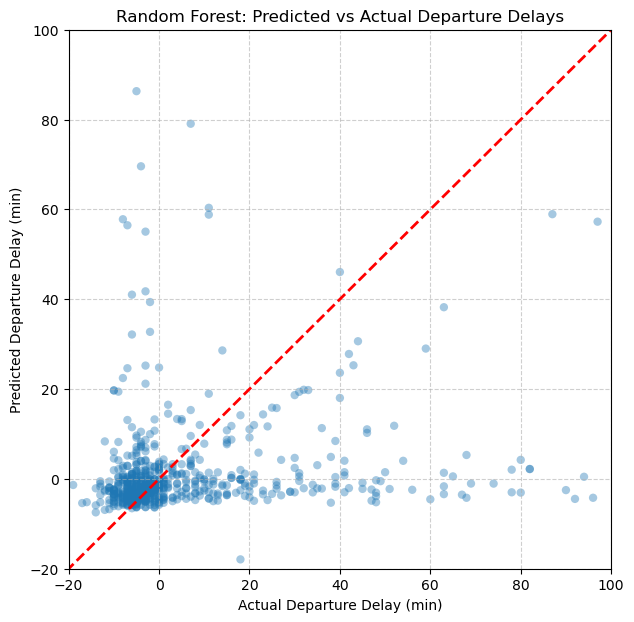

In [31]:
import matplotlib.pyplot as plt

# --- Predicted vs. Actual ---
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4, edgecolors='none')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Departure Delay (min)")
plt.ylabel("Predicted Departure Delay (min)")
plt.title("Random Forest: Predicted vs Actual Departure Delays")
plt.xlim(-20, 100)   # limit x-axis to typical range
plt.ylim(-20, 100)   # limit y-axis similarly
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [32]:

df["ROUTE"] = df["ORIGIN"] + "_" + df["DEST"]
 #Choose features for random forrest regression
features = [
    "MONTH",          # seasonal patterns (winter, summer, etc.)
    "DAY_OF_WEEK",    # weekday effects (Monday vs weekend)
    "DAY_OF_MONTH",
    "DISTANCE",       # flight length (short routes vs long-haul)
    "ORIGIN",         # origin airport congestion/weather patterns
    "DEST",   # destination airport influence 
    "DEP_TIME_sin",   # cyclical encoding of scheduled departure time
    "DEP_TIME_cos",   # cyclical encoding of scheduled departure time
]

features

['MONTH',
 'DAY_OF_WEEK',
 'DAY_OF_MONTH',
 'DISTANCE',
 'ORIGIN',
 'DEST',
 'DEP_TIME_sin',
 'DEP_TIME_cos']

In [33]:
X = df[features].copy()
y = df["DEP_DELAY_MIN"].copy()

X

,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,DISTANCE,ORIGIN,DEST,DEP_TIME_sin,DEP_TIME_cos
0,4,7,6,718.0,JFK,SAV,-9.807853e-01,0.195090
1,4,5,18,954.0,ELM,SFB,-8.410390e-01,0.540974
2,4,1,21,2248.0,JFK,LAS,-6.593458e-01,0.751840
3,4,5,25,3414.0,DEN,LIH,1.224647e-16,-1.000000
4,4,5,25,224.0,DFW,IAH,-9.271839e-01,0.374607
...,...,...,...,...,...,...,...,...
3595,9,4,5,806.0,LAS,GEG,8.433914e-01,-0.537300
3596,9,5,20,1024.0,DEN,SEA,-8.314696e-01,-0.555570
3597,9,3,25,610.0,LGA,GSP,-7.071068e-01,0.707107
3598,9,5,20,236.0,LAX,LAS,8.968727e-01,-0.442289


In [34]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
cat_features = ["ORIGIN", "DEST"
               ]

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Fit and transform categorical features
X_encoded_cats = encoder.fit_transform(df[cat_features])

# Convert encoded array back to DataFrame
encoded_cat_df = pd.DataFrame(
    X_encoded_cats,
    columns=encoder.get_feature_names_out(cat_features),
    index=df.index
)

# Combine encoded categorical features with numeric ones
numeric_features = [
    "MONTH", "DAY_OF_WEEK", "DISTANCE", "DEP_TIME_sin", "DEP_TIME_cos"
]

# Merge numeric and encoded categorical columns
X_final = pd.concat([df[numeric_features], encoded_cat_df], axis=1)

print(f"Final feature matrix shape: {X_final.shape}")
# Drop rows where target (DEP_DELAY_MIN) is missing

X_final.head()



Final feature matrix shape: (3536, 464)


,MONTH,DAY_OF_WEEK,DISTANCE,DEP_TIME_sin,DEP_TIME_cos,ORIGIN_ABQ,ORIGIN_ACV,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,...,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TYR,DEST_TYS,DEST_USA,DEST_VCT,DEST_VPS,DEST_XNA,DEST_XWA
0,4,7,718.0,-9.807853e-01,0.195090,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,5,954.0,-8.410390e-01,0.540974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1,2248.0,-6.593458e-01,0.751840,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,5,3414.0,1.224647e-16,-1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,224.0,-9.271839e-01,0.374607,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Drop rows where target (DEP_DELAY_MIN) is missing
df = df.dropna(subset=["DEP_DELAY_MIN"])


from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_final, 
    df["DEP_DELAY_MIN"], 
    test_size=0.2, 
    random_state=42
)



print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (2828, 464)
Test set shape: (708, 464)


In [42]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=100,      # number of trees
    max_depth=None,        # let trees expand until all leaves are pure
    min_samples_split=2,   # default: split node if it has >= 2 samples
    n_jobs=-1,             # use all CPU cores
    random_state=42
)


# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Root Mean Squared Error (RMSE): 124.21
Mean Absolute Error (MAE): 36.37
R² Score: 0.27


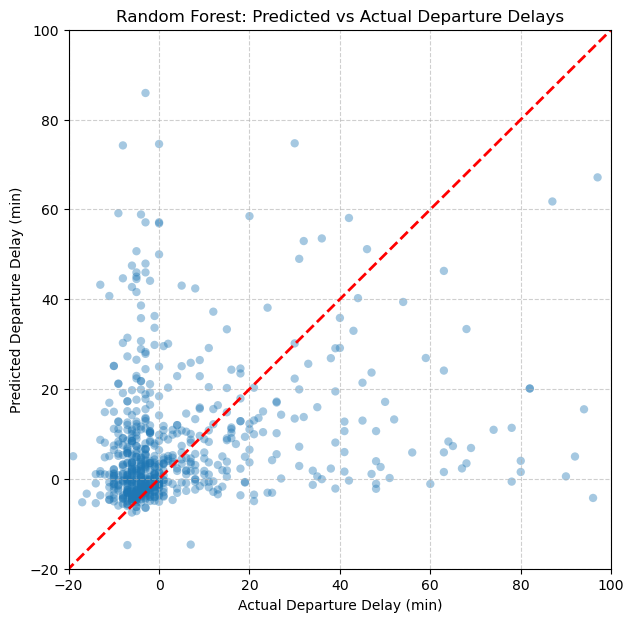

In [23]:
import matplotlib.pyplot as plt

# --- Predicted vs. Actual ---
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4, edgecolors='none')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Departure Delay (min)")
plt.ylabel("Predicted Departure Delay (min)")
plt.title("Random Forest: Predicted vs Actual Departure Delays")
plt.xlim(-20, 100)   # limit x-axis to typical range
plt.ylim(-20, 100)   # limit y-axis similarly
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to pair feature names with their importance
feature_importance_df = pd.DataFrame({
    "feature": X_final.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Display top features
feature_importance_df.head(15)

  

,feature,importance
4,DEP_TIME_cos,0.239376
3,DEP_TIME_sin,0.087124
2,DISTANCE,0.061136
0,MONTH,0.057756
91,ORIGIN_GNV,0.048739
409,DEST_PSE,0.044697
312,DEST_GPT,0.039035
1,DAY_OF_WEEK,0.032796
207,ORIGIN_SLC,0.029095
452,DEST_TPA,0.027505


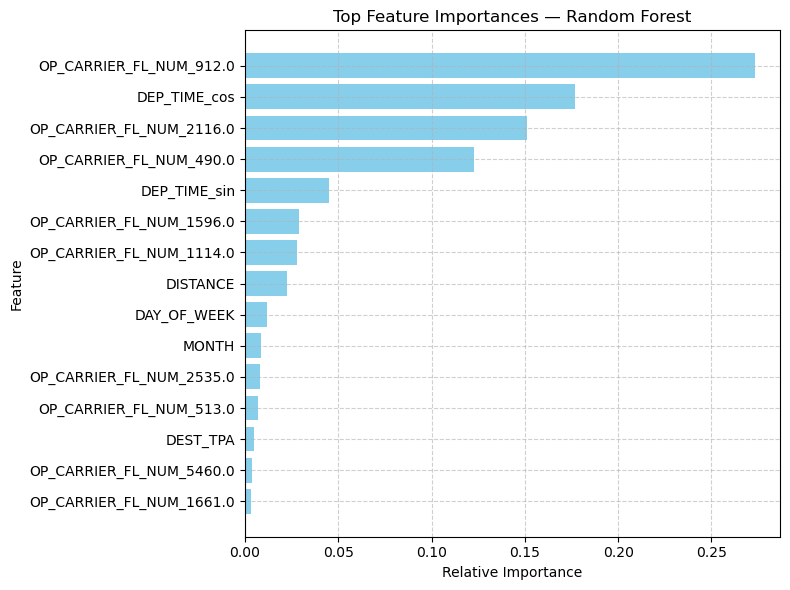

In [25]:
plt.figure(figsize=(8, 6))
top_n = 15  # adjust as needed
plt.barh(
    feature_importance_df["feature"].iloc[:top_n][::-1],
    feature_importance_df["importance"].iloc[:top_n][::-1],
    color="skyblue"
)
plt.title("Top Feature Importances — Random Forest")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [27]:
df["OP_CARRIER_FL_NUM"].describe()


count    1178.000000
mean     2579.768251
std      1648.731425
min         2.000000
25%      1245.000000
50%      2329.500000
75%      3754.500000
max      6529.000000
Name: OP_CARRIER_FL_NUM, dtype: float64

SyntaxError: invalid syntax (2971560710.py, line 1)